# PART A

### All the 34 excel files were combined into one excel file.

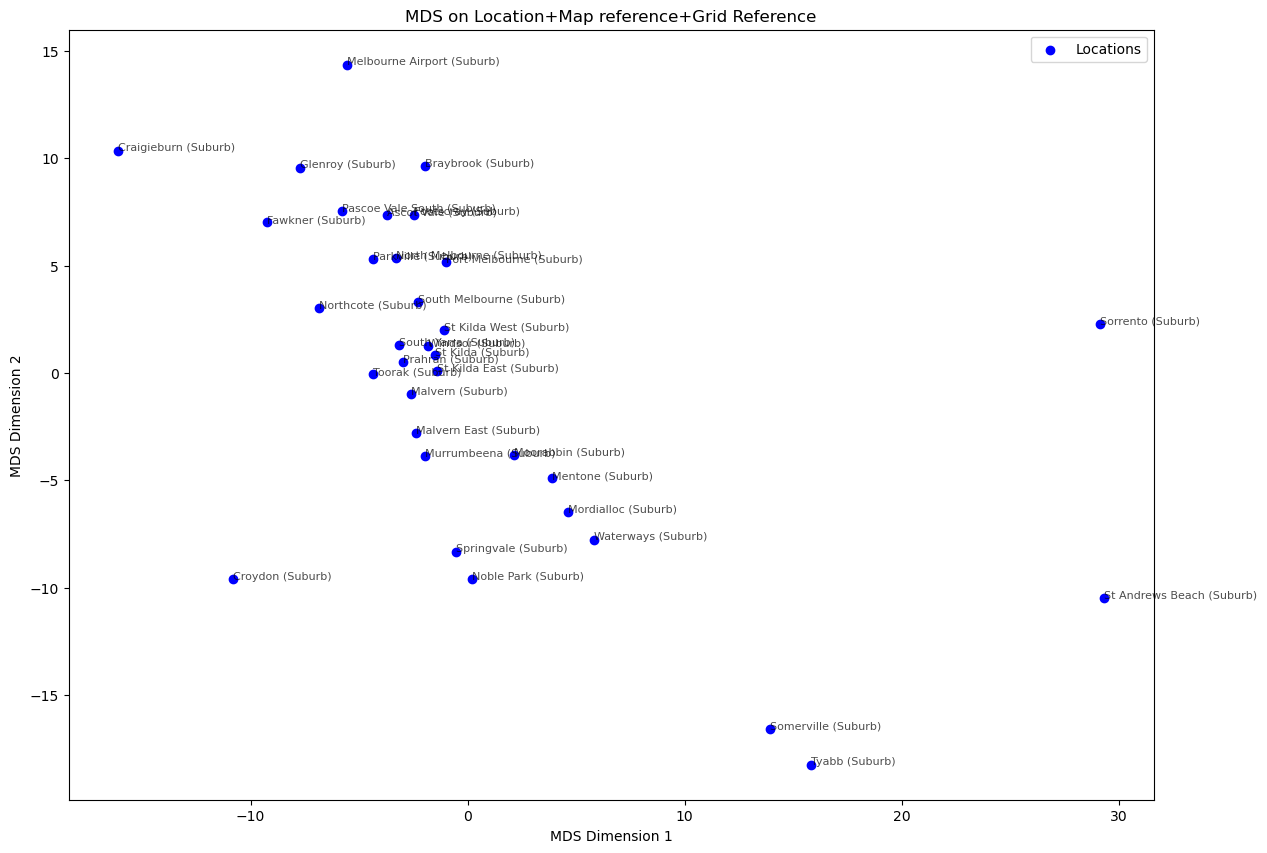

C:\Users\guhah\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


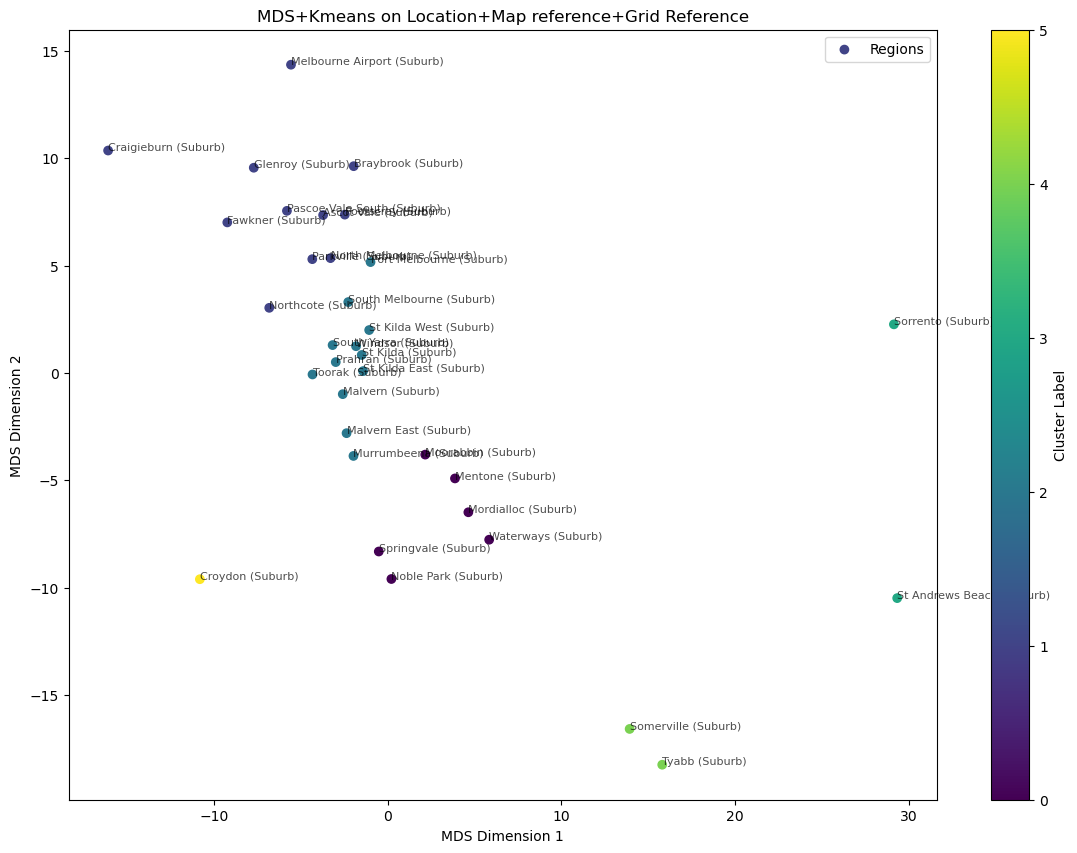

C:\Users\guhah\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\guhah\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\guhah\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\guhah\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

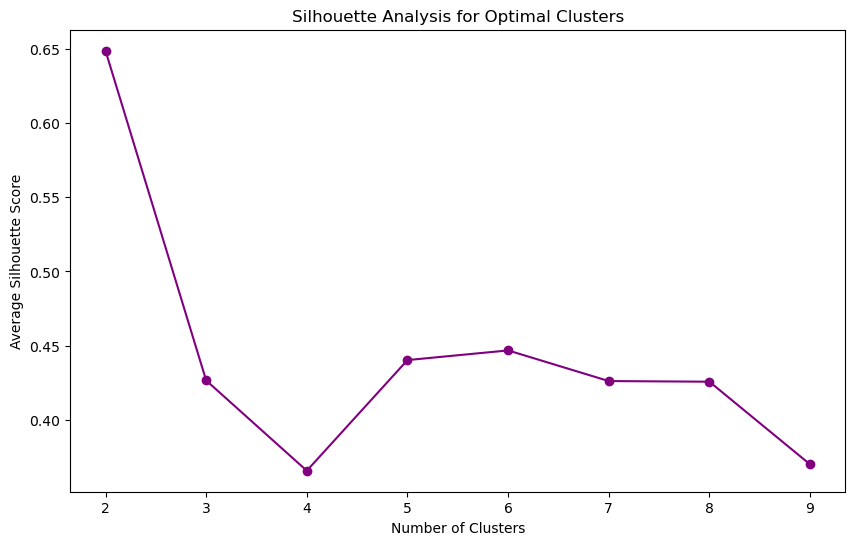

In [1]:
#SIMILARITY MEASURE 1
import matplotlib.pyplot as plt
from geopy.distance import great_circle  # Explicit haversine calculation
from geopy.point import Point
import re
import numpy as np
from sklearn.manifold import MDS
from sklearn.cluster import KMeans, SpectralClustering

# Base latitude and longitude of Melbourne
melbourne_coords = (-37.8136, 144.9631)  # Latitude, Longitude

# Direction to bearing conversion
direction_to_bearing = {
    'N': 0, 'S': 180, 'E': 90, 'W': 270,
    'NE': 45, 'NW': 315, 'SE': 135, 'SW': 225,
    'NNE': 22.5, 'NNW': 337.5, 'ENE': 67.5, 'WNW': 292.5,
    'SSE': 157.5, 'SSW': 202.5, 'ESE': 112.5, 'WSW': 247.5
}

# Function to parse location string and get lat/lon
def get_coordinates_from_location(location):
    distance_km = float(re.search(r'\d+', location).group())
    direction = re.search(r'(\b[NSEW]{1,3}\b)', location).group()
    bearing = direction_to_bearing.get(direction, 0)
    
    # Starting point as Melbourne
    start_point = Point(melbourne_coords[0], melbourne_coords[1])
    # Calculate new point based on distance and bearing
    new_point = great_circle(kilometers=distance_km).destination(start_point, bearing)
    
    return new_point.latitude, new_point.longitude

# Original locations (to calculate distances)
loc_orig = [
    '6km NW of Melbourne', '10km WNW of Melbourne', '27km N of Melbourne',
    '28km E of Melbourne', '12km N of Melbourne', '6km WNW of Melbourne',
    '13km NNW of Melbourne', '11km SE of Melbourne', '8km SE of Melbourne',
    '19km NW of Melbourne', '21km SSE of Melbourne', '16km SSE of Melbourne',
    '24km SSE of Melbourne', '13km SE of Melbourne', '25km SE of Melbourne',
    '6km NE of Melbourne', '2km NW of Melbourne', '3km NNW of Melbourne',
    '8km NNW of Melbourne', '4km WSW of Melbourne', '5km SE of Melbourne',
    '49km SSE of Melbourne', '62km SSW of Melbourne', '2km SSW of Melbourne',
    '4km SE of Melbourne', '22km SE of Melbourne', '68km S of Melbourne',
    '7km SSE of Melbourne', '6km SSE of Melbourne', '5km S of Melbourne',
    '6km ESE of Melbourne', '54km SSE of Melbourne', '27km SSE of Melbourne', 
    '5km SSE of Melbourne'
]

# New labels for each location
loc_labels = [
    'Ascot Vale (Suburb)', 'Braybrook (Suburb)', 'Craigieburn (Suburb)',
    'Croydon (Suburb)', 'Fawkner (Suburb)', 'Footscray (Suburb)',
    'Glenroy (Suburb)', 'Malvern East (Suburb)', 'Malvern (Suburb)',
    'Melbourne Airport (Suburb)', 'Mentone (Suburb)', 'Moorabbin (Suburb)',
    'Mordialloc (Suburb)', 'Murrumbeena (Suburb)', 'Noble Park (Suburb)',
    'Northcote (Suburb)', 'North Melbourne (Suburb)', 'Parkville (Suburb)',
    'Pascoe Vale South (Suburb)', 'Port Melbourne (Suburb)', 'Prahran (Suburb)',
    'Somerville (Suburb)', 'Sorrento (Suburb)', 'South Melbourne (Suburb)',
    'South Yarra (Suburb)', 'Springvale (Suburb)', 'St Andrews Beach (Suburb)',
    'St Kilda East (Suburb)', 'St Kilda (Suburb)', 'St Kilda West (Suburb)',
    'Toorak (Suburb)', 'Tyabb (Suburb)', 'Waterways (Suburb)', 'Windsor (Suburb)'
]

# Parse the locations to get latitudes and longitudes
coordinates = [get_coordinates_from_location(loc_str) for loc_str in loc_orig]

# Extract latitude and longitude lists
latitudes = [coord[0] for coord in coordinates]
longitudes = [coord[1] for coord in coordinates]

# Calculate the Haversine distance matrix
n = len(coordinates)
geographical_distance_matrix = np.zeros((n, n))

for i in range(n):
    for j in range(n):
        if i != j:
            geographical_distance_matrix[i][j] = great_circle(coordinates[i], coordinates[j]).km

# Define the axis values for the other entries (from your previous data)
axis_values = np.array([
    [4, 2, 3],
    [4, 1, 3],
    [2, 1, 3],
    [2, 2, 4],
    [4, 3, 1],
    [4, 2, 3],
    [4, 2, 1],
    [1, 4, 2],
    [1, 3, 2],
    [1, 5, 4],
    [2, 2, 2],
    [1, 4, 5],
    [2, 3, 3],
    [1, 4, 3],
    [2, 4, 2],
    [4, 3, 3],
    [4, 2, 3],
    [4, 3, 3],
    [4, 2, 2],
    [1, 1, 1],
    [1, 3, 2],
    [5, 5, 2],
    [5, 1, 3],
    [1, 2, 1],
    [1, 2, 1],
    [2, 4, 1],
    [5, 2, 4],
    [1, 3, 2],
    [1, 2, 2],
    [1, 2, 2],
    [1, 3, 1],
    [5, 5, 2],
    [2, 3, 4],
    [1, 2, 2]
])

# Calculate the Euclidean distance matrix for axis values
def euclidean_distance_matrix(data):
    num_entries = data.shape[0]
    distance_matrix = np.zeros((num_entries, num_entries))
    
    for i in range(num_entries):
        for j in range(num_entries):
            distance_matrix[i, j] = np.linalg.norm(data[i] - data[j])
    
    return distance_matrix

# Calculate the distance matrix for axis values
euclidean_distance_matrix = euclidean_distance_matrix(axis_values)

# Combine geographical and Euclidean distance matrices (averaging)
combined_distance_matrix = (geographical_distance_matrix + euclidean_distance_matrix) / 2

# Apply MDS to the combined distance matrix
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
mds_result = mds.fit_transform(combined_distance_matrix)

# Plot the MDS results
plt.figure(figsize=(14, 10))
plt.scatter(mds_result[:, 0], mds_result[:, 1], c='blue', label='Locations')
for i, loc_str in enumerate(loc_labels):
    plt.annotate(loc_str, (mds_result[i, 0], mds_result[i, 1]), fontsize=8, alpha=0.7)
plt.title("MDS on Location+Map reference+Grid Reference")
plt.xlabel("MDS Dimension 1")
plt.ylabel("MDS Dimension 2")
plt.legend()
plt.savefig('MDS_Locations.png', dpi=1000)
plt.show()

# Specify the number of clusters you want to use
n_clusters = 6  # Adjust this number based on your data and desired granularity

# Perform K-Means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(mds_result)

# Get the cluster labels
cluster_labels = kmeans.labels_

# Plot the MDS results with K-Means clustering
plt.figure(figsize=(14, 10))
scatter = plt.scatter(mds_result[:, 0], mds_result[:, 1], c=cluster_labels, cmap='viridis', label='Regions')
for i, loc_str in enumerate(loc_labels):
    plt.annotate(loc_str, (mds_result[i, 0], mds_result[i, 1]), fontsize=8, alpha=0.7)
plt.colorbar(scatter, label='Cluster Label')
plt.title("MDS+Kmeans on Location+Map reference+Grid Reference")
plt.xlabel("MDS Dimension 1")
plt.ylabel("MDS Dimension 2")
plt.legend()
plt.savefig('MDS_KMeans_Locations.png', dpi=1000)
plt.show()

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Range of cluster numbers to try
cluster_range = range(2, 10)  # Start from 2, as silhouette score is not defined for 1 cluster
silhouette_scores = []  # List to store silhouette scores for each k

# Calculate silhouette score for each number of clusters
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(mds_result)
    silhouette_avg = silhouette_score(mds_result, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores for each k
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o', linestyle='-', color='purple')
plt.title("Silhouette Analysis for Optimal Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Average Silhouette Score")
plt.xticks(cluster_range)
plt.savefig("Silhoutte_Location.png",dpi=1000)
plt.show()


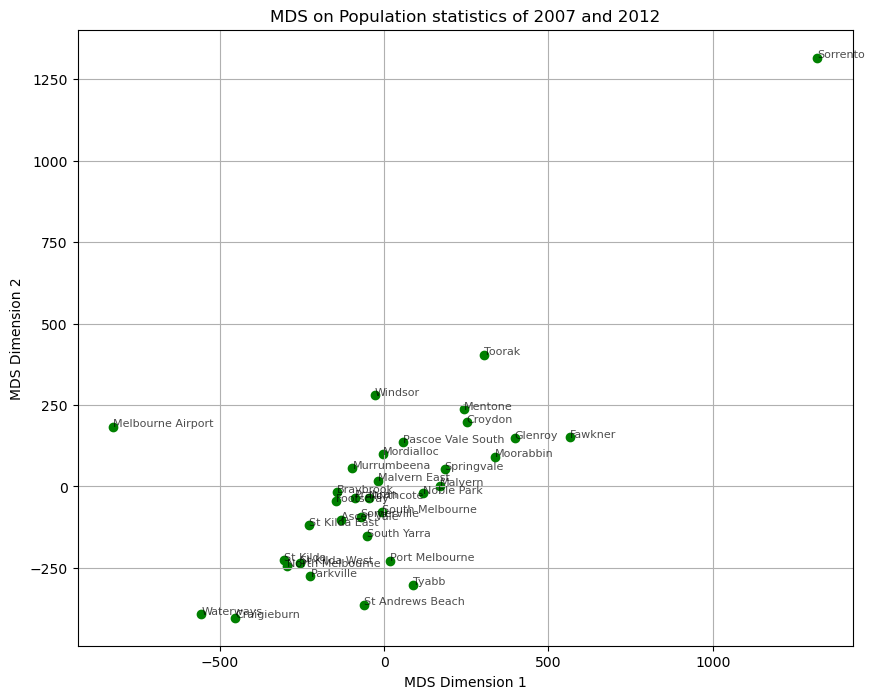

C:\Users\guhah\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\guhah\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\guhah\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\guhah\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

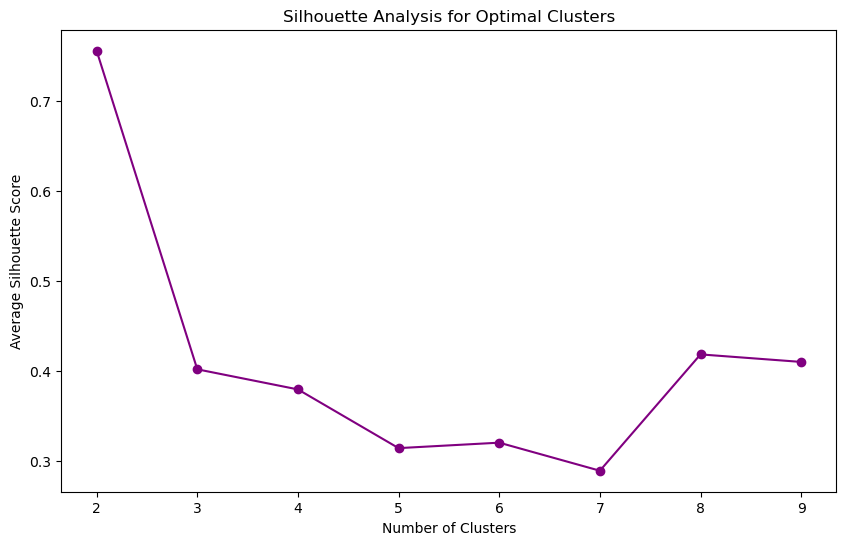

C:\Users\guhah\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


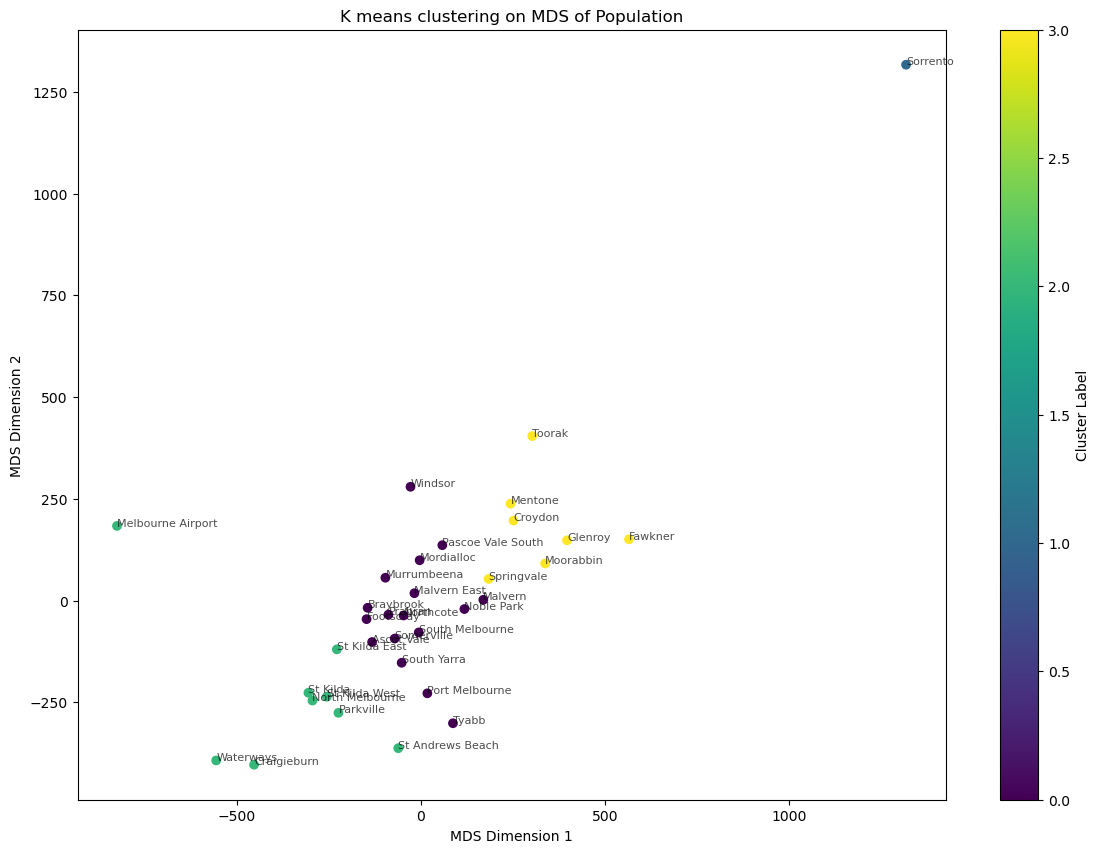

In [14]:
#SIMILARITY MEASURE 2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances
from sklearn.manifold import MDS
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.metrics import silhouette_score

# File path and sheet name
file_path = 'C://Users//guhah//ML_for_CPS//ml_project_full.xlsx'
sheet_name = 'data'
columns_to_retrieve = "C:AJ"  # Example column range, modify if necessary

# List of row indices to retrieve (note: subtract 1 for zero-based indexing in skiprows)
rows_to_retrieve = [43, 45, 47, 49, 51, 68, 70, 72, 74, 76]

# Suburb names to use as labels
suburb_labels = [
    "Ascot Vale", "Braybrook", "Craigieburn", "Croydon", "Fawkner", "Footscray", 
    "Glenroy", "Malvern East", "Malvern", "Melbourne Airport", "Mentone", 
    "Moorabbin", "Mordialloc", "Murrumbeena", "Noble Park", "Northcote", 
    "North Melbourne", "Parkville", "Pascoe Vale South", "Port Melbourne", 
    "Prahran", "Somerville", "Sorrento", "South Melbourne", "South Yarra", 
    "Springvale", "St Andrews Beach", "St Kilda East", "St Kilda", "St Kilda West", 
    "Toorak", "Tyabb", "Waterways", "Windsor"
]

# Dictionary to store the results for each row
distance_matrices = {}

# Loop through each specified row
for row in rows_to_retrieve:
    # Read the data for the current row
    data = pd.read_excel(file_path, sheet_name=sheet_name, usecols=columns_to_retrieve, nrows=1, skiprows=row-1, header=None)
    
    # Convert data to numpy array and flatten the feature
    feature_values = data.values.flatten()
    
    # Create a 34x34 matrix by repeating the feature values
    feature_matrix = np.tile(feature_values, (34, 1))
    
    # Calculate the pairwise Euclidean distance matrix
    distance_matrix = pairwise_distances(feature_matrix.T, metric='manhattan')
    
    # Store the distance matrix in the dictionary with the row index as the key
    distance_matrices[row] = distance_matrix

# Sum all distance matrices
total_distance_matrix = sum(distance_matrices[row] for row in rows_to_retrieve)

# Perform MDS on the combined distance matrix
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
mds_result = mds.fit_transform(total_distance_matrix)

# Plotting the MDS results
plt.figure(figsize=(10, 8))
plt.scatter(mds_result[:, 0], mds_result[:, 1], c='green')
for i, suburb in enumerate(suburb_labels):
    plt.annotate(suburb, (mds_result[i, 0], mds_result[i, 1]), fontsize=8, alpha=0.7)
plt.title("MDS on Population statistics of 2007 and 2012")
plt.xlabel("MDS Dimension 1")
plt.ylabel("MDS Dimension 2")
plt.grid()
plt.savefig('MDS_Population.png', dpi=1000)
plt.show()


# K-Means clustering with silhouette analysis to find the optimal number of clusters
cluster_range = range(2, 10)
silhouette_scores = []

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(mds_result)
    silhouette_avg = silhouette_score(mds_result, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o', linestyle='-', color='purple')
plt.title("Silhouette Analysis for Optimal Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Average Silhouette Score")
plt.xticks(cluster_range)
plt.savefig('Silhoutte Population.png', dpi=1000)
plt.show()

# Perform K-Means clustering using the optimal number of clusters (example with 4 clusters)
n_clusters = 4  # Adjust based on silhouette analysis
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels_kmeans = kmeans.fit_predict(mds_result)

# Plot MDS results with K-Means clustering
plt.figure(figsize=(14, 10))
scatter = plt.scatter(mds_result[:, 0], mds_result[:, 1], c=cluster_labels_kmeans, cmap='viridis')
for i, suburb in enumerate(suburb_labels):
    plt.annotate(suburb, (mds_result[i, 0], mds_result[i, 1]), fontsize=8, alpha=0.7)
plt.colorbar(scatter, label='Cluster Label')
plt.title("K means clustering on MDS of Population")
plt.xlabel("MDS Dimension 1")
plt.ylabel("MDS Dimension 2")
plt.savefig('K means_MDS_Population.png', dpi=1000)
plt.show()


C:\Users\guhah\anaconda3\Lib\site-packages\sklearn\metrics\pairwise.py:2317: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
C:\Users\guhah\anaconda3\Lib\site-packages\sklearn\metrics\pairwise.py:2317: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
C:\Users\guhah\anaconda3\Lib\site-packages\sklearn\metrics\pairwise.py:2317: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
C:\Users\guhah\anaconda3\Lib\site-packages\sklearn\metrics\pairwise.py:2317: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
C:\Users\guhah\anaconda3\Lib\site-packages\sklearn\metrics\pairwise.py:2317: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
C:\Users\guhah\anaconda3\Lib\site-p

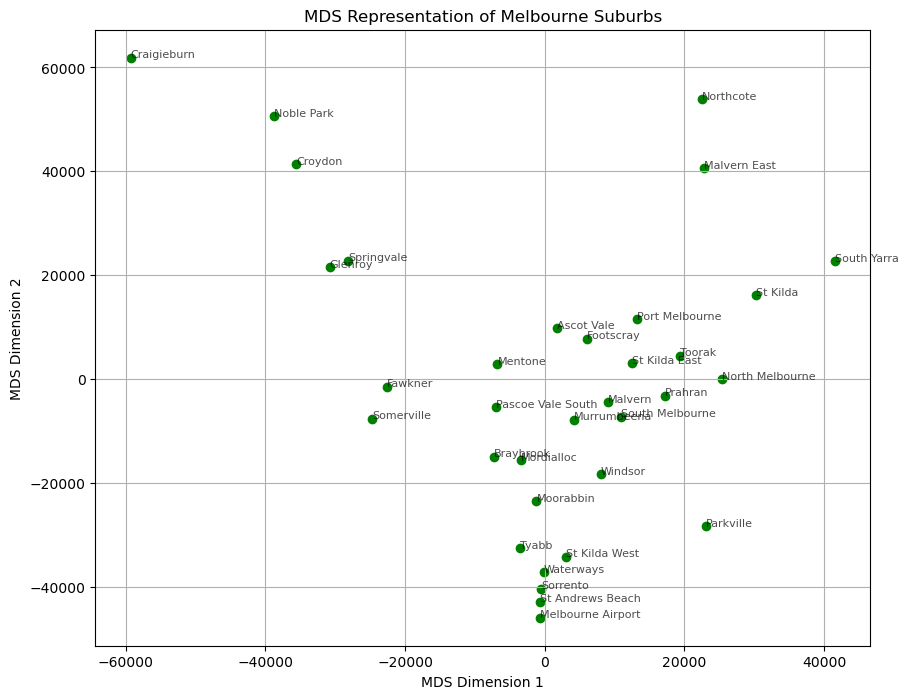

C:\Users\guhah\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\guhah\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\guhah\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\guhah\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

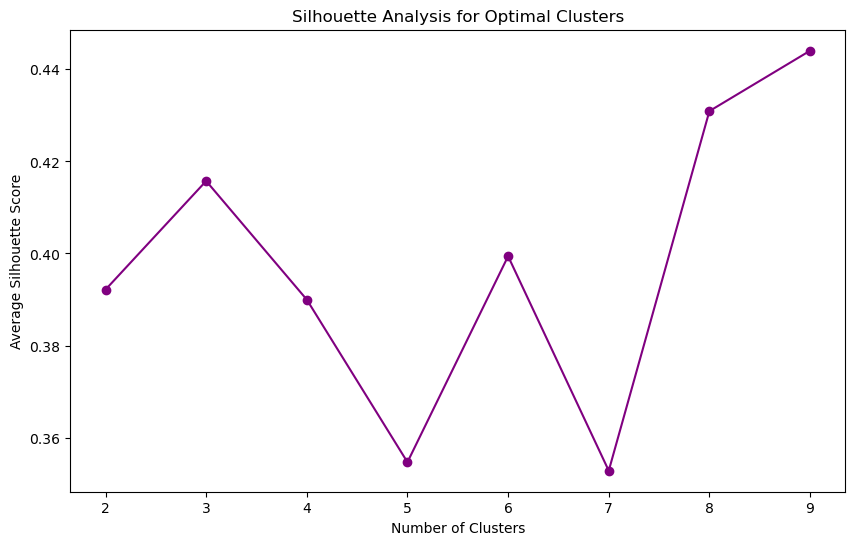

C:\Users\guhah\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


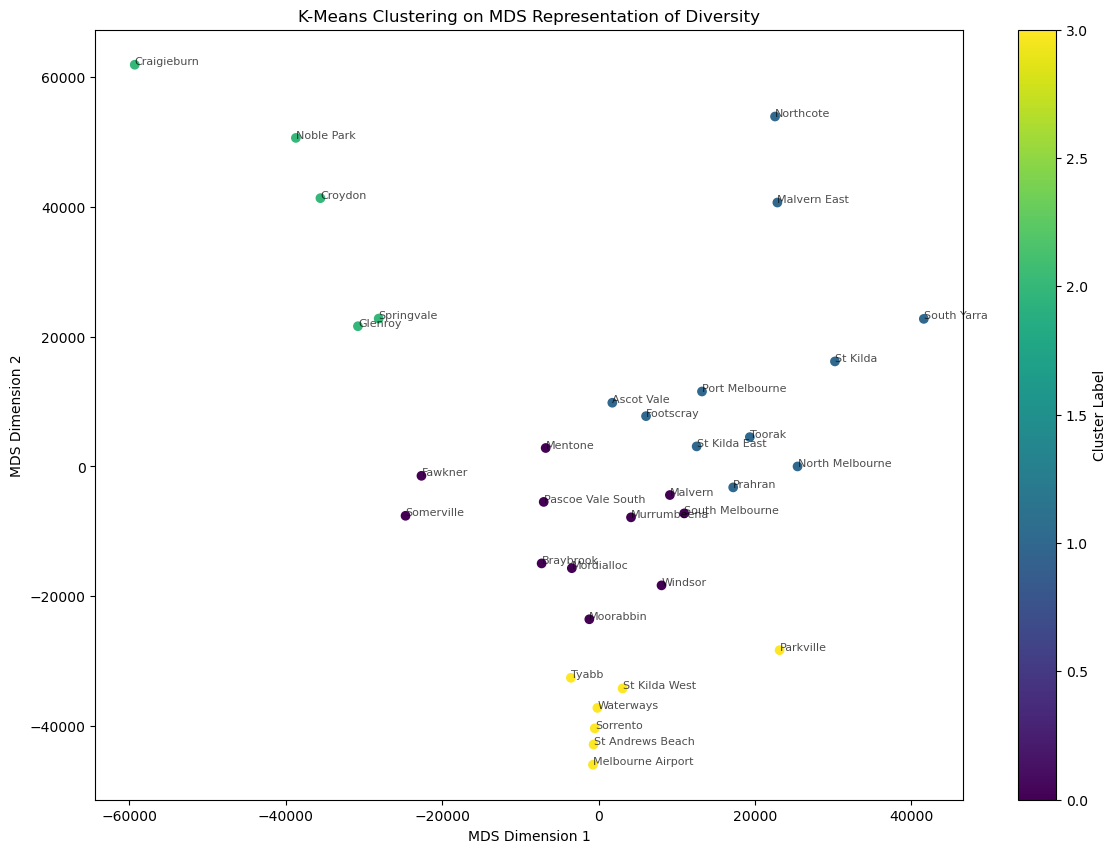

C:\Users\guhah\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


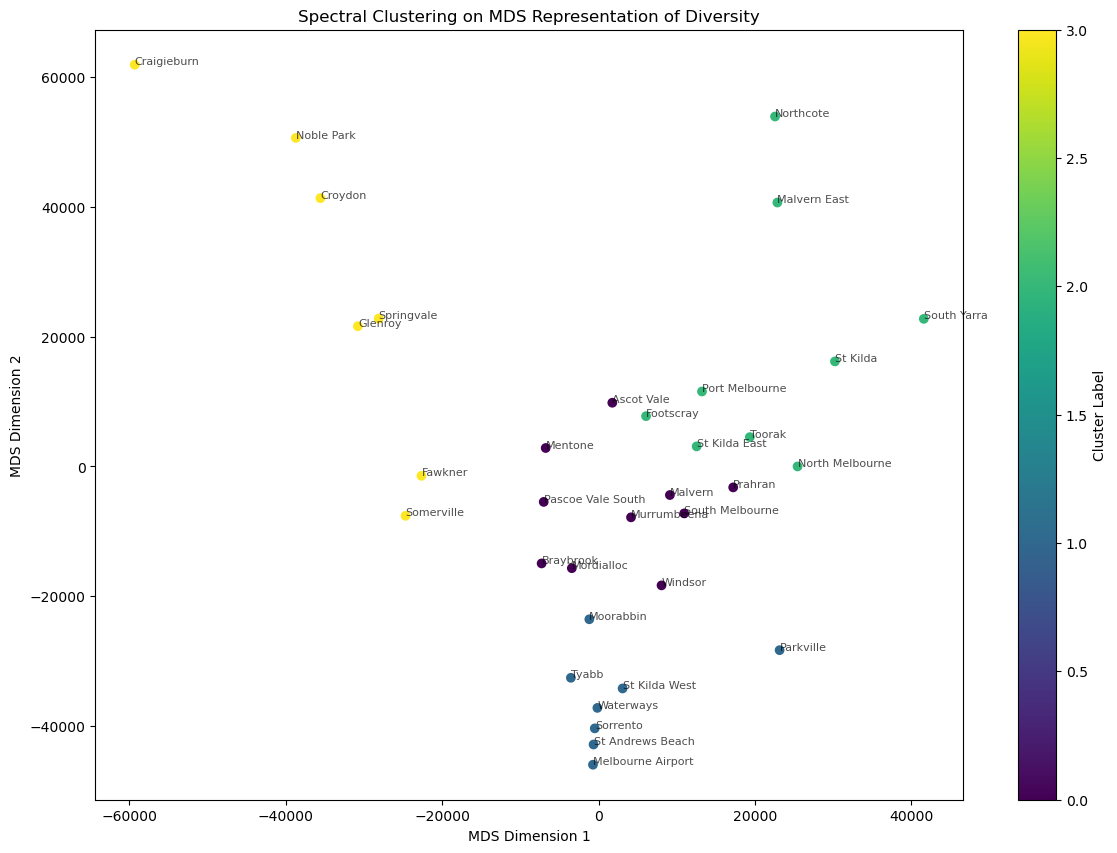

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances
from sklearn.manifold import MDS
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder

# File path and sheet name
file_path = 'C://Users//guhah//ML_for_CPS//ml_project_full.xlsx'
sheet_name = 'data'
columns_to_retrieve = "C:AJ"  # Example column range, modify if necessary

# List of row indices to retrieve (note: subtract 1 for zero-based indexing in skiprows)
numerical_rows = [139, 140, 141, 142, 143, 144, 145, 146]
categorical_rows = [159, 161,163,165,167,169]

# Suburb names to use as labels
suburb_labels = [
    "Ascot Vale", "Braybrook", "Craigieburn", "Croydon", "Fawkner", "Footscray", 
    "Glenroy", "Malvern East", "Malvern", "Melbourne Airport", "Mentone", 
    "Moorabbin", "Mordialloc", "Murrumbeena", "Noble Park", "Northcote", 
    "North Melbourne", "Parkville", "Pascoe Vale South", "Port Melbourne", 
    "Prahran", "Somerville", "Sorrento", "South Melbourne", "South Yarra", 
    "Springvale", "St Andrews Beach", "St Kilda East", "St Kilda", "St Kilda West", 
    "Toorak", "Tyabb", "Waterways", "Windsor"
]

# Dictionary to store the results for each row
distance_matrices = {}

# Function to calculate Jaccard similarity for categorical data
def jaccard_similarity(x, y):
    # Ensure that both x and y are binary vectors (or categorical encoding)
    return np.sum(x == y) / float(np.sum((x == 1) | (y == 1)))

# Loop through each specified row
for row in numerical_rows:
    # Read the data for the current row (numerical data)
    data = pd.read_excel(file_path, sheet_name=sheet_name, usecols=columns_to_retrieve, nrows=1, skiprows=row-1, header=None)
    
    # Convert numerical data to numpy array (flatten)
    feature_values = data.values.flatten()
    
    # Create a 34x34 matrix by repeating the feature values for pairwise comparison
    feature_matrix = np.tile(feature_values, (34, 1))
    
    # Calculate the pairwise Euclidean distance matrix
    distance_matrix = pairwise_distances(feature_matrix.T, metric='euclidean')
    
    # Store the distance matrix in the dictionary with the row index as the key
    distance_matrices[row] = distance_matrix

# Process categorical rows with Jaccard similarity
for row in categorical_rows:
    # Read the data for the current row (categorical data)
    data = pd.read_excel(file_path, sheet_name=sheet_name, usecols=columns_to_retrieve, nrows=1, skiprows=row-1, header=None)
    
    # Convert categorical data to numerical encoding
    le = LabelEncoder()
    data_encoded = le.fit_transform(data.values.flatten())
    
    # Create a 34x34 matrix by repeating the feature values (encoded) for pairwise comparison
    feature_matrix = np.tile(data_encoded, (34, 1))
    
    # Calculate the pairwise Jaccard distance matrix
    distance_matrix = pairwise_distances(feature_matrix.T, metric='jaccard')
    
    # Store the distance matrix in the dictionary with the row index as the key
    distance_matrices[row] = distance_matrix

# Sum all distance matrices
total_distance_matrix = sum(distance_matrices[row] for row in numerical_rows + categorical_rows)

# Perform MDS on the combined distance matrix
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
mds_result = mds.fit_transform(total_distance_matrix)

# Plotting the MDS results
plt.figure(figsize=(10, 8))
plt.scatter(mds_result[:, 0], mds_result[:, 1], c='green')
for i, suburb in enumerate(suburb_labels):
    plt.annotate(suburb, (mds_result[i, 0], mds_result[i, 1]), fontsize=8, alpha=0.7)
plt.title("MDS Representation of Melbourne Suburbs")
plt.xlabel("MDS Dimension 1")
plt.ylabel("MDS Dimension 2")
plt.grid()
plt.savefig('MDS_Diversity.png', dpi=1000)
plt.show()

# K-Means clustering with silhouette analysis to find the optimal number of clusters
cluster_range = range(2, 10)
silhouette_scores = []

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(mds_result)
    silhouette_avg = silhouette_score(mds_result, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o', linestyle='-', color='purple')
plt.title("Silhouette Analysis for Optimal Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Average Silhouette Score")
plt.xticks(cluster_range)
plt.savefig('Silhoutte_diversity.png', dpi=1000)
plt.show()

# Perform K-Means clustering using the optimal number of clusters (example with 4 clusters)
n_clusters = 4  # Adjust based on silhouette analysis
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels_kmeans = kmeans.fit_predict(mds_result)

# Plot MDS results with K-Means clustering
plt.figure(figsize=(14, 10))
scatter = plt.scatter(mds_result[:, 0], mds_result[:, 1], c=cluster_labels_kmeans, cmap='viridis')
for i, suburb in enumerate(suburb_labels):
    plt.annotate(suburb, (mds_result[i, 0], mds_result[i, 1]), fontsize=8, alpha=0.7)
plt.colorbar(scatter, label='Cluster Label')
plt.title("K-Means Clustering on MDS Representation of Diversity")
plt.xlabel("MDS Dimension 1")
plt.ylabel("MDS Dimension 2")
plt.savefig('MDS_KMeans on Diversity.png', dpi=1000)
plt.show()

# Perform Spectral Clustering with a specified number of clusters (example with 4 clusters)
n_clusters = 4  # Adjust as needed
spectral_clustering = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors', random_state=42)
cluster_labels_spectral = spectral_clustering.fit_predict(mds_result)

# Plot MDS results with Spectral Clustering
plt.figure(figsize=(14, 10))
scatter = plt.scatter(mds_result[:, 0], mds_result[:, 1], c=cluster_labels_spectral, cmap='viridis')
for i, suburb in enumerate(suburb_labels):
    plt.annotate(suburb, (mds_result[i, 0], mds_result[i, 1]), fontsize=8, alpha=0.7)
plt.colorbar(scatter, label='Cluster Label')
plt.title("Spectral Clustering on MDS Representation of Diversity")
plt.xlabel("MDS Dimension 1")
plt.ylabel("MDS Dimension 2")
plt.savefig('MDS_Spectral on Diversity.png', dpi=1000)
plt.show()


### PART B

C:\Users\guhah\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\guhah\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\guhah\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\guhah\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

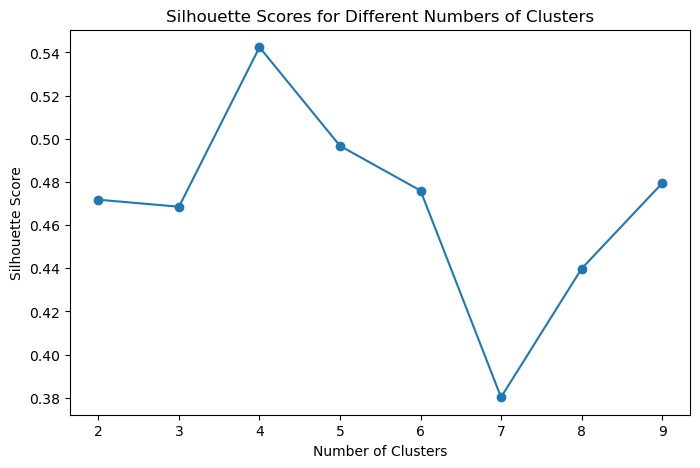

Optimal number of clusters: 4


C:\Users\guhah\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


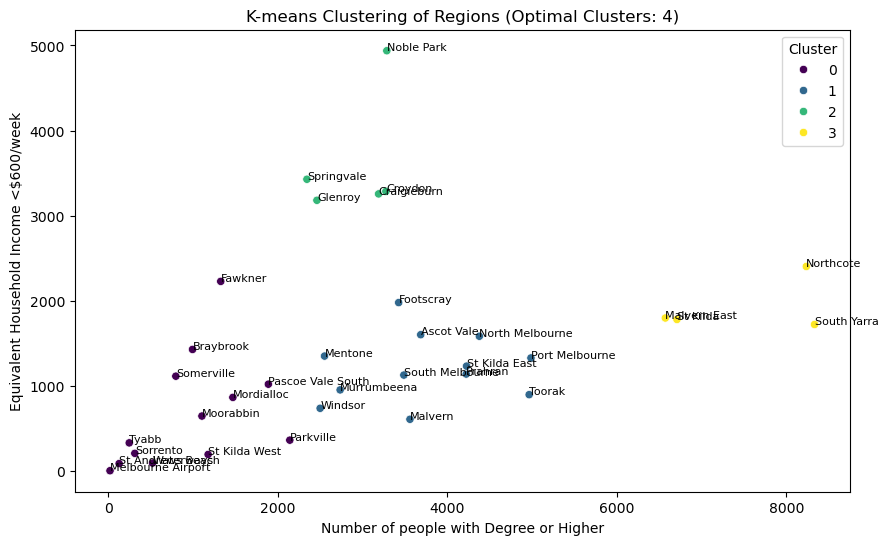

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns

# Load the Excel file and sheet
file_path = 'C://Users//guhah//ML_for_CPS//ml_project_full.xlsx'
sheet_name = 'data'  # Make sure this matches the sheet name in the file

# Specify rows to retrieve and columns to analyze
rows_to_retrieve = [143, 126]  # Row 143: Holds Degree, Row 126: Income under $600
columns_to_retrieve = "C:AJ"   # Adjust column range as needed

# Initialize an empty list to store each row's data
data_list = []

# Loop to read each row into data_list
for row in rows_to_retrieve:
    data = pd.read_excel(file_path, sheet_name=sheet_name, usecols=columns_to_retrieve, nrows=1, skiprows=row-1, header=None)
    data_list.append(data)

# Concatenate data rows into a single DataFrame and transpose for clustering
data = pd.concat(data_list, ignore_index=True).T
data.columns = ["Holds_Degree", "Income_Under_600"]

# Label rows with suburb names for easy visualization
suburb_labels = [
    "Ascot Vale", "Braybrook", "Craigieburn", "Croydon", "Fawkner", "Footscray", 
    "Glenroy", "Malvern East", "Malvern", "Melbourne Airport", "Mentone", 
    "Moorabbin", "Mordialloc", "Murrumbeena", "Noble Park", "Northcote", 
    "North Melbourne", "Parkville", "Pascoe Vale South", "Port Melbourne", 
    "Prahran", "Somerville", "Sorrento", "South Melbourne", "South Yarra", 
    "Springvale", "St Andrews Beach", "St Kilda East", "St Kilda", "St Kilda West", 
    "Toorak", "Tyabb", "Waterways", "Windsor"
]
data.index = suburb_labels[:data.shape[0]]  # Ensure labels match data rows

# Determine the optimal number of clusters using silhouette score
silhouette_scores = []
k_range = range(2, 10)  # Testing cluster sizes from 2 to 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    cluster_labels = kmeans.fit_predict(data)
    silhouette_avg = silhouette_score(data, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot silhouette scores for each k
plt.figure(figsize=(8, 5))
plt.plot(k_range, silhouette_scores, marker='o')
plt.title("Silhouette Scores for Different Numbers of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()

# Find the best k based on the highest silhouette score
best_k = k_range[silhouette_scores.index(max(silhouette_scores))]
print(f"Optimal number of clusters: {best_k}")

# Perform K-means clustering with the optimal number of clusters
kmeans_optimal = KMeans(n_clusters=best_k, random_state=0)
data['Cluster'] = kmeans_optimal.fit_predict(data)

# Plot the clusters with suburb labels
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Holds_Degree", y="Income_Under_600", hue="Cluster", data=data, palette="viridis")
for i, txt in enumerate(data.index):
    plt.annotate(txt, (data["Holds_Degree"].iloc[i], data["Income_Under_600"].iloc[i]), fontsize=8)
plt.title(f"K-means Clustering of Regions (Optimal Clusters: {best_k})")
plt.xlabel("Number of people with Degree or Higher")
plt.ylabel("Equivalent Household Income <$600/week")
plt.legend(title="Cluster")
plt.savefig("KMeans on income vs degree holder.png",dpi=1000)
plt.show()


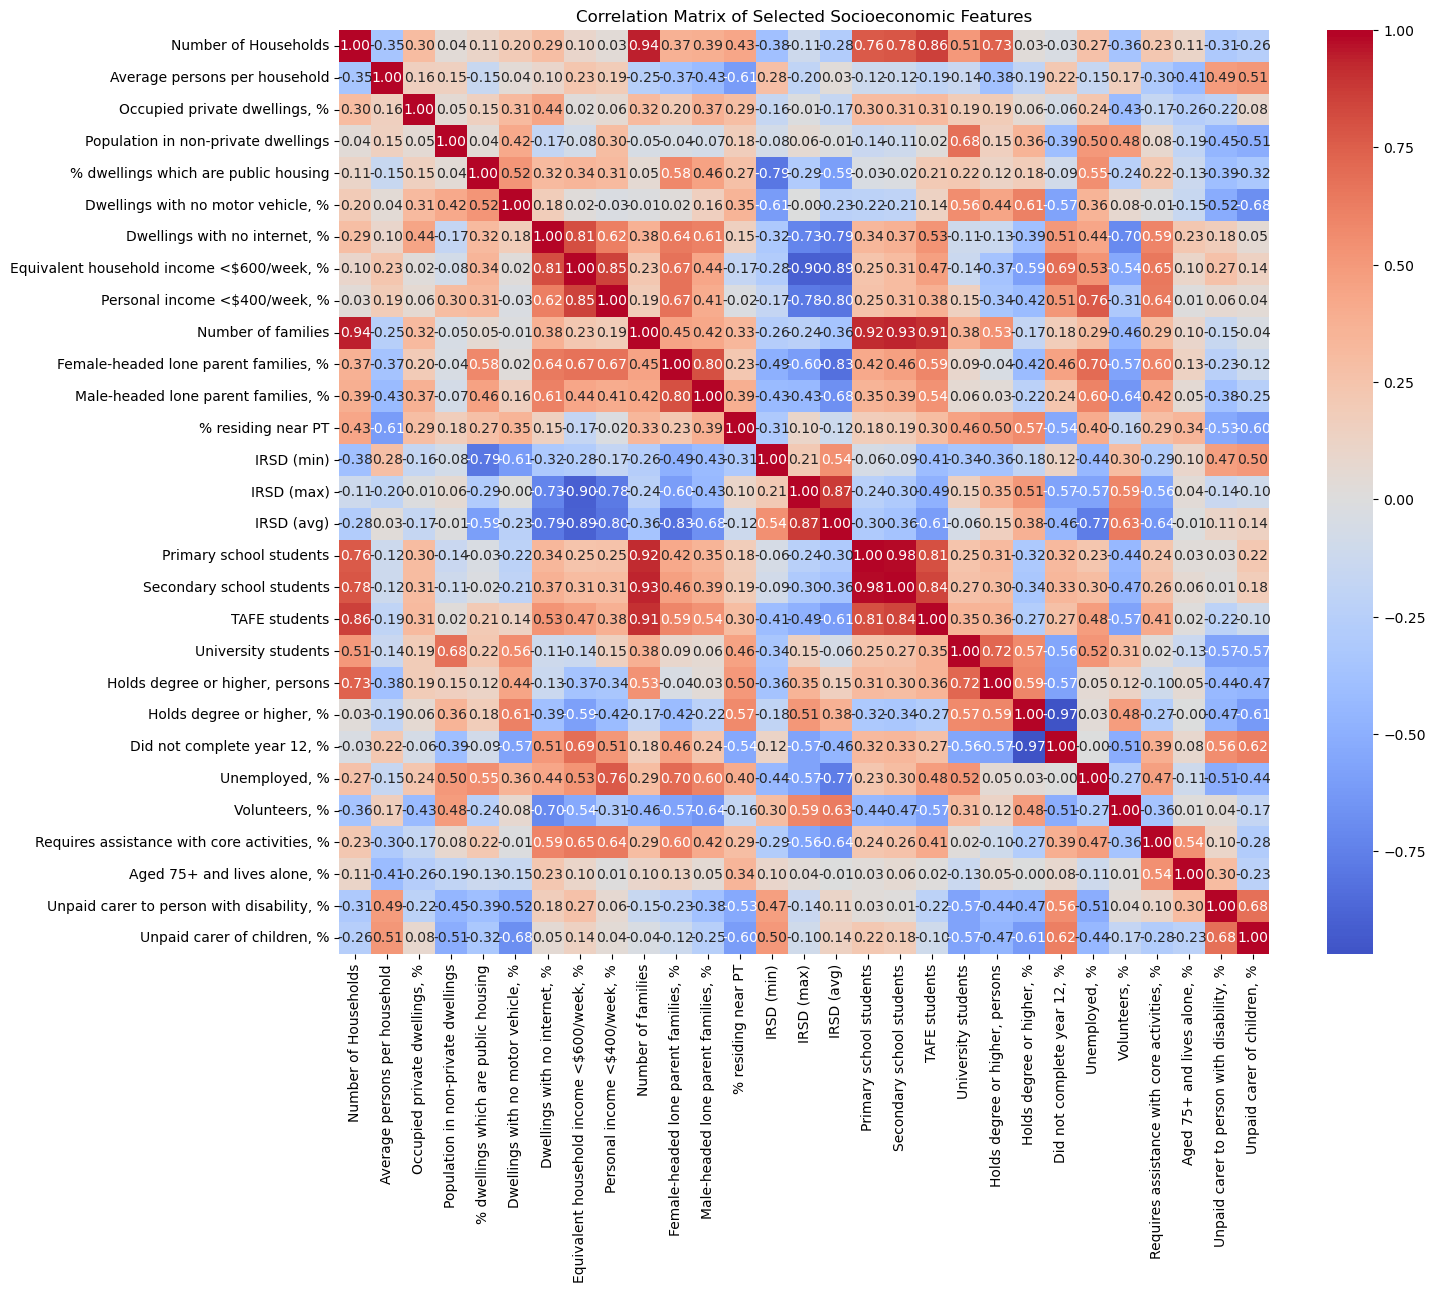

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Excel file and specify the sheet
file_path = 'C://Users//guhah//ML_for_CPS//ml_project_full.xlsx'
sheet_name = 'data'  # Replace with your actual sheet name if different

# Define the rows for the selected unique features
rows_to_retrieve = [
    115, 116, 118, 119, 121, 123, 125, 127, 129, 130, 132, 134, 135, 136, 137,
    138, 139, 140, 141, 142, 143, 144, 146, 148, 150, 152, 154, 156, 158
]

# Corresponding feature names
feature_names = [
    "Number of Households", "Average persons per household", "Occupied private dwellings, %",
    "Population in non-private dwellings", "% dwellings which are public housing", 
    "Dwellings with no motor vehicle, %", "Dwellings with no internet, %",
    "Equivalent household income <$600/week, %", "Personal income <$400/week, %",
    "Number of families", "Female-headed lone parent families, %", 
    "Male-headed lone parent families, %", "% residing near PT", "IRSD (min)", 
    "IRSD (max)", "IRSD (avg)", "Primary school students", "Secondary school students", 
    "TAFE students", "University students", "Holds degree or higher, persons", 
    "Holds degree or higher, %", "Did not complete year 12, %", "Unemployed, %", 
    "Volunteers, %", "Requires assistance with core activities, %", 
    "Aged 75+ and lives alone, %", "Unpaid carer to person with disability, %", 
    "Unpaid carer of children, %"
]

# Read each specified row individually and append them to the data frame
data = pd.DataFrame()
for row in rows_to_retrieve:
    # Read the data for the current row
    row_data = pd.read_excel(file_path, sheet_name=sheet_name, usecols="C:AJ", nrows=1, skiprows=row-1, header=None)
    data = pd.concat([data, row_data], ignore_index=True)

# Transpose data to have regions as rows and features as columns
data = data.T
data.columns = feature_names

# Compute the correlation matrix
correlation_matrix = data.corr()

# Plot the correlation matrix with values
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0, fmt=".2f")
plt.title("Correlation Matrix of Selected Socioeconomic Features")
plt.savefig("Correlation_socioeconomic.png",dpi=1000)
plt.show()


# PART B

In [12]:
import pandas as pd
data = pd.read_csv('./combined_suburbs.csv')

In [13]:
categorical_columns = [
    'Region', 'ABS remoteness category', 'DHS Area', 'Nearest Public Hospital', 'Nearest public hospital with maternity services', 
    'Top country of birth', '', '2nd top country of birth', '3rd top country of birth', 'Nearest public hospital with emergency department',
    '4th top country of birth', '5th top country of birth', 'Top language spoken', 'Top industry', '2nd top industry - persons',
    '2nd top language spoken', '3rd top language spoken', '4th top language spoken', '3rd top industry - persons', '2nd top occupation - persons', 
    '5th top language spoken', 'Location', 'LGA', 'Primary Care Partnership', 'Medicare Local', 'Top occupation', '3rd top occupation - persons'
]

In [14]:
numeric_columns = [col for col in data.columns if col not in categorical_columns and col != 'Suburb']

In [15]:
# Convert non-categorical columns to numeric, handling errors by coercing invalid values to NaN
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')

In [16]:
# Replace NaN values in numeric_columns with the median value of each column
data[numeric_columns] = data[numeric_columns].apply(lambda col: col.fillna(col.median()))

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

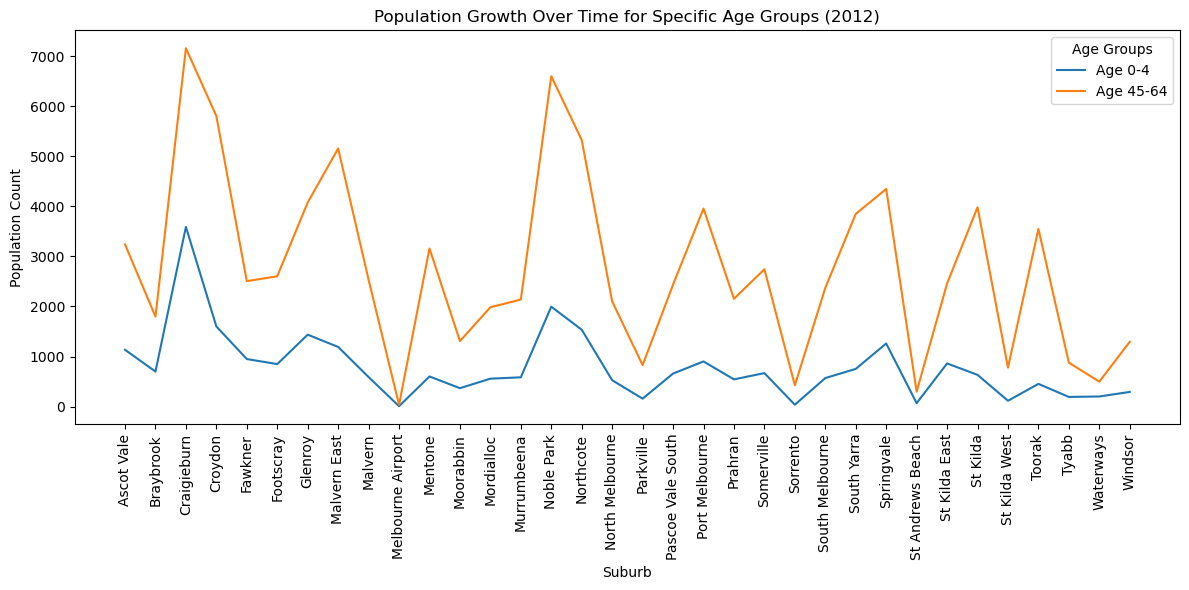

In [18]:
# Filter data to focus on specific age groups
age_groups_data = data[['Suburb', '2012 ERP age 0-4, persons', '2012 ERP age 45-64, persons']]

# Plotting a line graph for age groups
plt.figure(figsize=(12, 6))
plt.plot(age_groups_data['Suburb'], age_groups_data['2012 ERP age 0-4, persons'], label='Age 0-4')
plt.plot(age_groups_data['Suburb'], age_groups_data['2012 ERP age 45-64, persons'], label='Age 45-64')

plt.title('Population Growth Over Time for Specific Age Groups (2012)')
plt.xlabel('Suburb')
plt.ylabel('Population Count')
plt.xticks(rotation=90)
plt.legend(title='Age Groups')
plt.tight_layout()
plt.savefig('pop_growth.png', dpi=1000)
plt.show()

# Healthcare Accessibility Analysis

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

def analyze_hospital_access(df):
    """
    2.1 Hospital Access Assessment
    """
    def calculate_access_score(row):
        """Calculate healthcare accessibility score based on multiple factors"""
        # Normalize distances and times (inverse relationship)
        time_factor = 1 / (1 + row['Travel time to nearest public hospital'])
        distance_factor = 1 / (1 + row['Distance to nearest public hospital'])
        ed_factor = 1 / (1 + row['Distance to nearest public hospital with emergency department'])
        
        # Weight the factors (can be adjusted based on importance)
        return (0.4 * time_factor + 0.3 * distance_factor + 0.3 * ed_factor) * 100

    # Calculate accessibility scores
    df['healthcare_access_score'] = df.apply(calculate_access_score, axis=1)
    
    # Analyze relationship between access and utilization
    analysis_results = {
        # Emergency department analysis
        'ed_correlation': stats.pearsonr(
            df['Travel time to nearest public hospital with emergency department'],
            df['Presentations to emergency departments, 2012-13']
        ),
        
        # Maternity services analysis
        'maternity_correlation': stats.pearsonr(
            df['Distance to nearest public hospital with maternity services'],
            df['Obstetric type separations, 2012-13']
        ),
        
        # Population density impact
        'density_correlation': stats.pearsonr(
            df['Population Density'],
            df['healthcare_access_score']
        )
    }
    
    
    
    return analysis_results, df['healthcare_access_score']

def analyze_healthcare_utilization(df):
    """
    2.2 Healthcare Utilization Patterns
    """
    # Analyze ED presentation patterns
    ed_analysis = {
        # Category 4&5 ED presentations vs GP availability
        'ed_gp_correlation': stats.pearsonr(
            df['Category 4 & 5 emergency department presentations, %'],
            df['General Practice']
        ),
        
        # Create GP access ratio
        'gp_population_ratio': df['General Practice'] / df['2012 ERP, total']
    }
    
    # Analyze aged care patterns
    aged_care_analysis = {
        'high_care_ratio': df['Aged Care (High Care)'] / df['2012 ERP age 85+, persons'],
        'low_care_ratio': df['Aged Care (Low Care)'] / df['2012 ERP age 85+, persons'],
        'total_care_ratio': (df['Aged Care (High Care)'] + df['Aged Care (Low Care)']) / 
                           df['2012 ERP age 85+, persons']
    }
    
    # Analyze remoteness impact
    remoteness_analysis = pd.DataFrame({
        'ARIA_avg': df['ARIA+ (avg)'],
        'ED_presentations_per_capita': df['Presentations to emergency departments, 2012-13'] / 
                                     df['2012 ERP, total'],
        'GP_per_capita': df['General Practice'] / df['2012 ERP, total']
    })
    
    
    
    
    return ed_analysis, aged_care_analysis, remoteness_analysis

def analyze_vulnerability(df):
    """
    2.3 Vulnerability Analysis
    """
    # Calculate vulnerability scores
    def calculate_elderly_vulnerability(row):
        elderly_pop = row['2012 ERP age 85+, persons']
        healthcare_access = row['healthcare_access_score']
        aged_care_facilities = row['Aged Care (High Care)'] + row['Aged Care (Low Care)']
        return (elderly_pop / row['2012 ERP, total']) * (100 - healthcare_access) * \
               (1 / (1 + aged_care_facilities))

    def calculate_disability_vulnerability(row):
        disability_rate = row['Requires assistance with core activities, %']
        support_services = row['Disability'] + row['Allied Health']
        return disability_rate * (100 - row['healthcare_access_score']) * \
               (1 / (1 + support_services))

    def calculate_transport_vulnerability(row):
        no_vehicle = row['Dwellings with no motor vehicle, %']
        pt_access = row['% residing near PT']
        return no_vehicle * (100 - pt_access)

    # Calculate vulnerability scores
    df['elderly_vulnerability'] = df.apply(calculate_elderly_vulnerability, axis=1)
    df['disability_vulnerability'] = df.apply(calculate_disability_vulnerability, axis=1)
    df['transport_vulnerability'] = df.apply(calculate_transport_vulnerability, axis=1)
    
    # Identify high-risk areas
    vulnerability_threshold = 90  # 90th percentile
    high_risk_areas = {
        'elderly': df[df['elderly_vulnerability'] > 
                     df['elderly_vulnerability'].quantile(0.9)][['Suburb', 'elderly_vulnerability']],
        'disability': df[df['disability_vulnerability'] > 
                        df['disability_vulnerability'].quantile(0.9)][['Suburb', 'disability_vulnerability']],
        'transport': df[df['transport_vulnerability'] > 
                       df['transport_vulnerability'].quantile(0.9)][['Suburb', 'transport_vulnerability']]
    }
    
    
    
    
    return high_risk_areas, df[['elderly_vulnerability', 'disability_vulnerability', 
                               'transport_vulnerability', 'composite_vulnerability']]

def generate_phase2_report(df):
    """
    Generate comprehensive Phase 2 analysis report
    """
    # Run all analyses
    hospital_results, access_scores = analyze_hospital_access(df)
    ed_results, aged_care_results, remoteness_results = analyze_healthcare_utilization(df)
    high_risk_areas, vulnerability_scores = analyze_vulnerability(df)
    
    # Compile findings
    findings = {
        'hospital_access': {
            'access_score_summary': access_scores.describe(),
            'correlation_results': hospital_results
        },
        'healthcare_utilization': {
            'ed_patterns': ed_results,
            'aged_care_patterns': aged_care_results,
            'remoteness_impact': remoteness_results.describe()
        },
        'vulnerability_analysis': {
            'high_risk_areas': high_risk_areas,
            'vulnerability_scores': vulnerability_scores.describe()
        }
    }
    
    return findings
    

In [21]:
findings = generate_phase2_report(data)

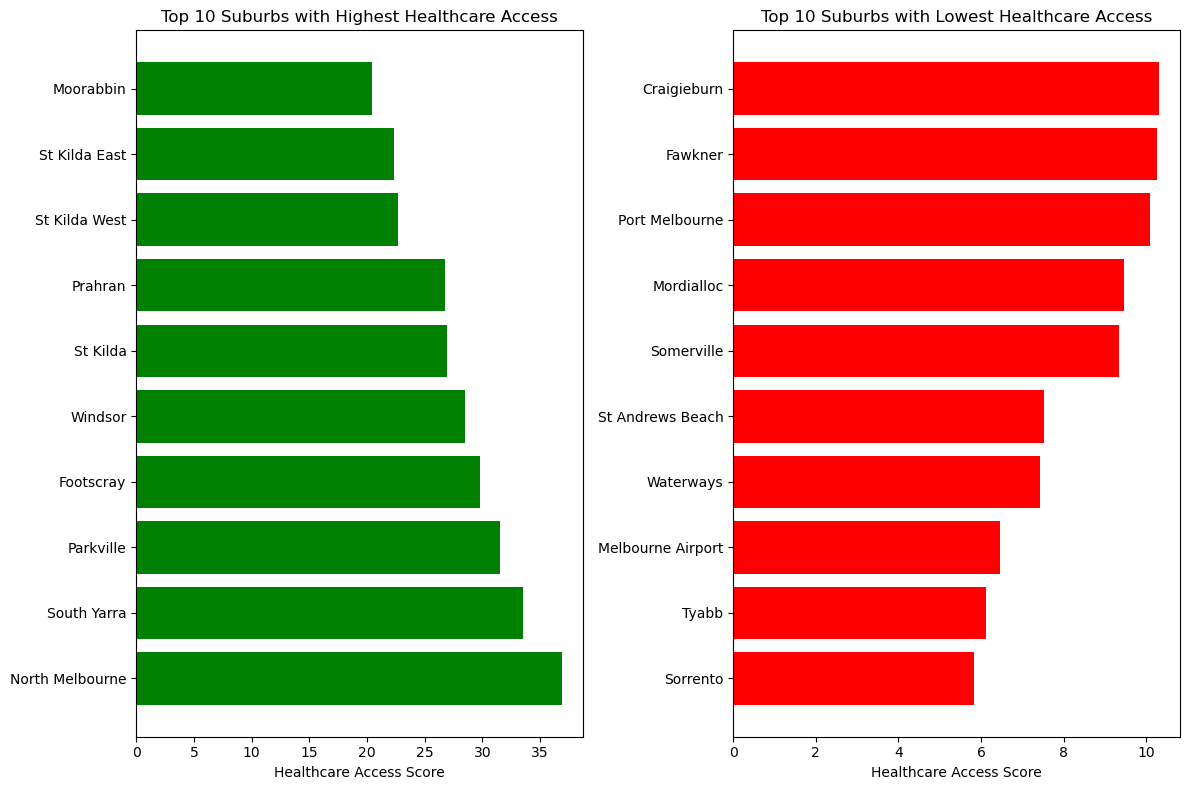

In [22]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'data' is your DataFrame and it has a column 'Healthcare_Access_Score'
# Sort the data to get the highest and lowest healthcare access scores
top_access = data[['Suburb', 'healthcare_access_score']].sort_values(by='healthcare_access_score', ascending=False).head(10)
bottom_access = data[['Suburb', 'healthcare_access_score']].sort_values(by='healthcare_access_score', ascending=True).head(10)

# Plotting the bar chart
plt.figure(figsize=(12, 8))

# Top 10 suburbs
plt.subplot(1, 2, 1)
plt.barh(top_access['Suburb'], top_access['healthcare_access_score'], color='green')
plt.xlabel('Healthcare Access Score')
plt.title('Top 10 Suburbs with Highest Healthcare Access')

# Bottom 10 suburbs
plt.subplot(1, 2, 2)
plt.barh(bottom_access['Suburb'], bottom_access['healthcare_access_score'], color='red')
plt.xlabel('Healthcare Access Score')
plt.title('Top 10 Suburbs with Lowest Healthcare Access')

plt.tight_layout()
plt.show()

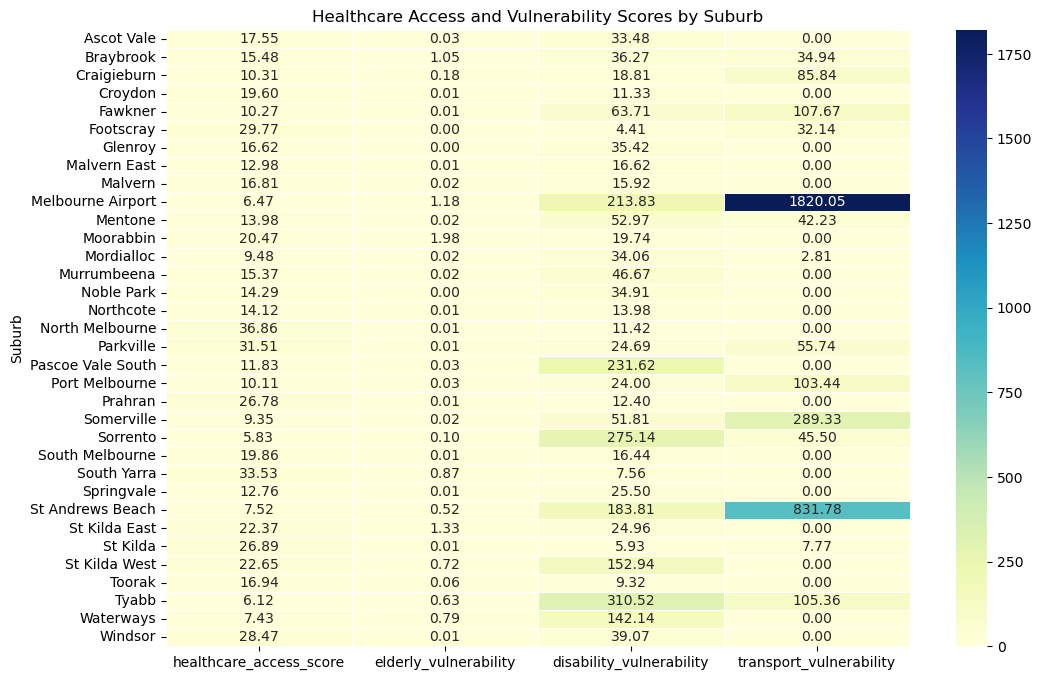

In [23]:
# Combining healthcare access score and vulnerability scores
combined_data = data[['Suburb', 'healthcare_access_score', 'elderly_vulnerability', 'disability_vulnerability', 'transport_vulnerability']]

# Set Suburb column as the index
combined_data.set_index('Suburb', inplace=True)

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(combined_data, annot=True, cmap='YlGnBu', fmt='.2f', linewidths=0.5)
plt.title('Healthcare Access and Vulnerability Scores by Suburb')
plt.savefig('vul.png', dpi=1000)
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_15016\711533748.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data['Vulnerability_Score'] = data['elderly_vulnerability'] + data['disability_vulnerability'] + data['transport_vulnerability']


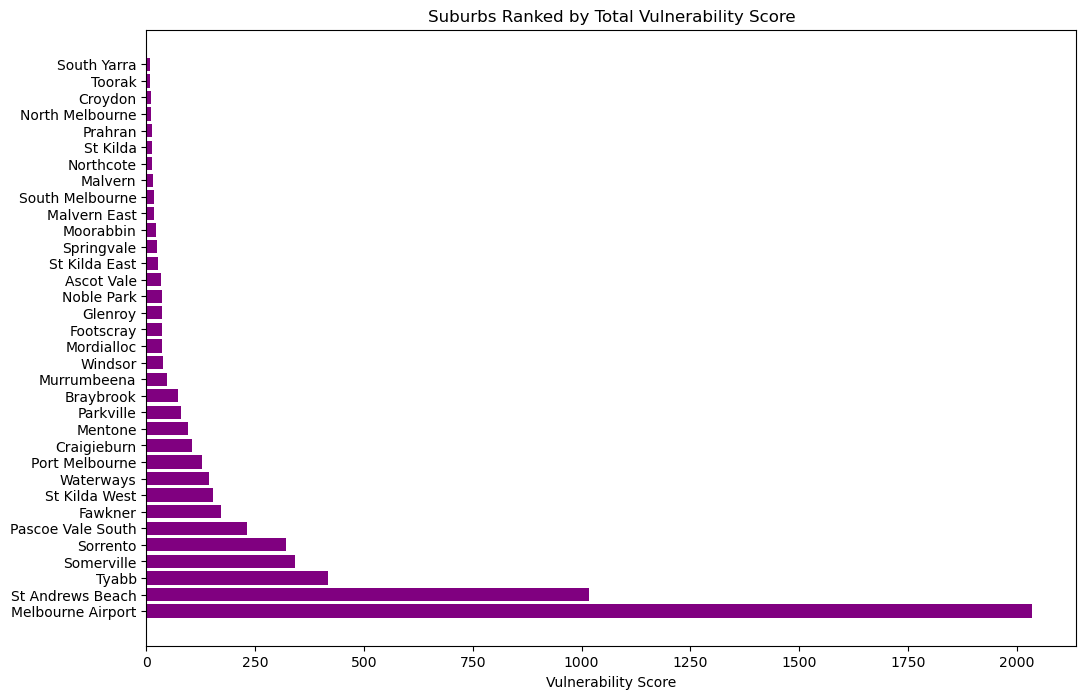

In [24]:
# Create a new column that combines all the vulnerability factors into a total score (optional)
data['Vulnerability_Score'] = data['elderly_vulnerability'] + data['disability_vulnerability'] + data['transport_vulnerability']

# Sort suburbs by vulnerability score (highest first)
sorted_vulnerability = data[['Suburb', 'Vulnerability_Score']].sort_values(by='Vulnerability_Score', ascending=False)

# Plotting the bar chart for vulnerability score
plt.figure(figsize=(12, 8))
plt.barh(sorted_vulnerability['Suburb'], sorted_vulnerability['Vulnerability_Score'], color='purple')
plt.xlabel('Vulnerability Score')
plt.title('Suburbs Ranked by Total Vulnerability Score')
plt.show()

# Demographic Change Analysis

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


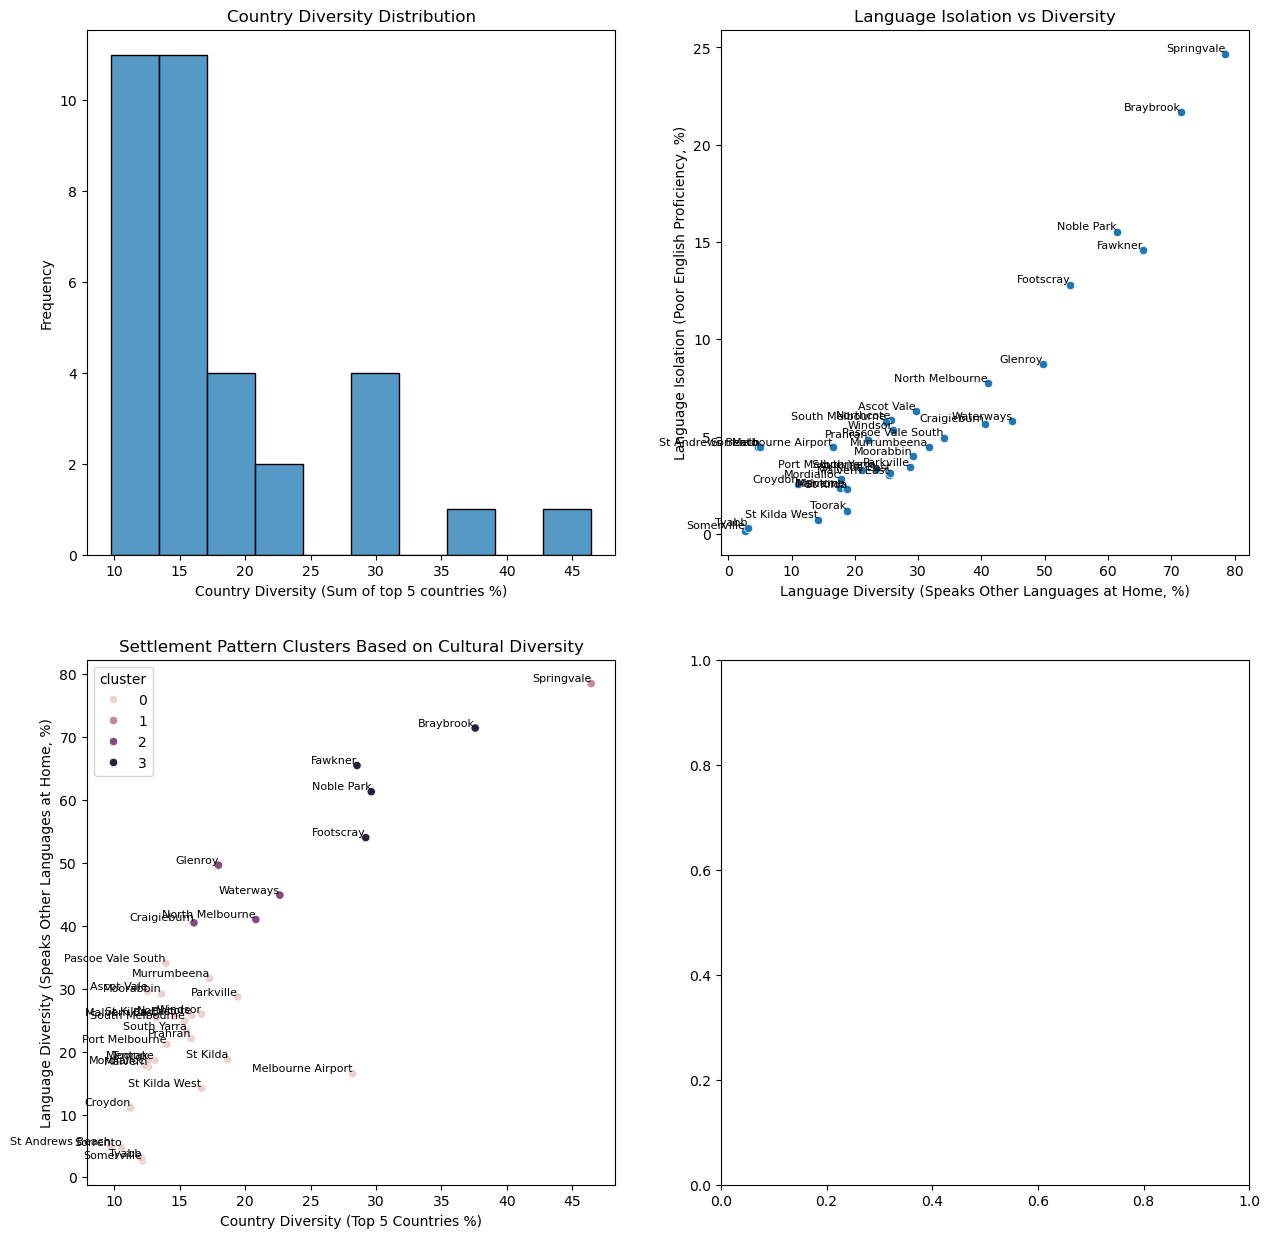

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

def analyze_population_growth(df):
    """
    3.1 Population Growth Patterns
    This function analyzes the changes in population across different age groups 
    between 2007 and 2012, with a focus on identifying high-growth areas.
    It also looks at the potential service pressures in education and healthcare.
    """
    age_groups = ['0-4', '5-9', '10-14', '15-19', '20-24', '25-44', 
                  '45-64', '65-69', '70-74', '75-79', '80-84', '85+']

    def calculate_growth_metrics(df):
        # Calculate absolute and percentage changes for total population and each age group
        growth_metrics = pd.DataFrame()
        
        # Total population change
        growth_metrics['total_growth_abs'] = df['2012 ERP, total'] - df['2007 ERP, total']
        growth_metrics['total_growth_pct'] = ((df['2012 ERP, total'] - df['2007 ERP, total']) / 
                                            df['2007 ERP, total'] * 100)
        
        # Calculate growth metrics for each age group
        for age in age_groups:
            col_2007 = f'2007 ERP age {age}, persons'
            col_2012 = f'2012 ERP age {age}, persons'
            growth_metrics[f'{age}_growth_abs'] = df[col_2012] - df[col_2007]
            growth_metrics[f'{age}_growth_pct'] = ((df[col_2012] - df[col_2007]) / 
                                                 df[col_2007] * 100)
        
        return growth_metrics
    
    # Get growth metrics
    growth_analysis = calculate_growth_metrics(df)
    
    # Identify high-growth areas (areas with growth above the 75th percentile)
    growth_threshold = growth_analysis['total_growth_pct'].quantile(0.75)
    high_growth_areas = df[growth_analysis['total_growth_pct'] > growth_threshold]
    
    # Service pressure analysis
    service_impact = pd.DataFrame()
    # Education pressure: ratio of youth population growth to number of primary schools
    service_impact['education_pressure'] = (
        growth_analysis['5-9_growth_abs'] + growth_analysis['10-14_growth_abs']
    ) / df['Primary Schools'].replace(0, 0.1)
    
    # Healthcare pressure: ratio of elderly population growth to number of hospitals
    service_impact['healthcare_pressure'] = (
        growth_analysis['65-69_growth_abs'] + growth_analysis['70-74_growth_abs'] +
        growth_analysis['75-79_growth_abs'] + growth_analysis['80-84_growth_abs'] +
        growth_analysis['85+_growth_abs']
    ) / (df['Public Hospitals'] + df['Private Hospitals']).replace(0, 0.1)
    
    
    
    return growth_analysis, service_impact, high_growth_areas

def analyze_cultural_diversity(df):
    """
    3.2 Cultural Diversity Assessment
    This function evaluates cultural diversity in Melbourne suburbs by calculating 
    diversity indices based on country of birth, language spoken, and identifying 
    areas in need of translation services.
    """
    def calculate_diversity_metrics(df):
        diversity_metrics = pd.DataFrame()
        
        # Calculate country diversity based on the top 5 countries of birth
        diversity_metrics['country_diversity'] = (
            df['Top country of birth, %'] +
            df['2nd top country of birth, %'] +
            df['3rd top country of birth, %'] +
            df['4th top country of birth, %'] +
            df['5th top country of birth, %']
        )
        
        # Calculate language diversity and isolation (proportion of people speaking a language other than English at home)
        diversity_metrics['language_diversity'] = df['Speaks LOTE at home, %']
        diversity_metrics['language_isolation'] = df['Poor English proficiency, %']
        
        # Calculate the need for translation services based on language isolation
        diversity_metrics['translation_need_score'] = (
            diversity_metrics['language_isolation'] * df['2012 ERP, total']
        )
        
        return diversity_metrics
    
    # Get diversity metrics
    diversity_analysis = calculate_diversity_metrics(df)
    
    # Perform clustering to identify different settlement patterns based on diversity
    X = StandardScaler().fit_transform(diversity_analysis)
    kmeans = KMeans(n_clusters=4, random_state=42).fit(X)
    diversity_analysis['cluster'] = kmeans.labels_
    
    # Service alignment analysis: identifying gaps in translation services
    service_alignment = pd.DataFrame()
    service_alignment['translation_service_gap'] = (
        diversity_analysis['translation_need_score'] / 
        df['Community Health Centres'].replace(0, 0.1)
    )
    
    # Visualizations to explain cultural diversity patterns and settlement clusters
    fig, axes = plt.subplots(2, 2, figsize=(15, 15))
    
    # Plot 1: Country diversity distribution (how diverse the population is based on country of birth)
    sns.histplot(
        data=diversity_analysis,
        x='country_diversity',
        ax=axes[0,0]
    )
    axes[0,0].set_title('Country Diversity Distribution')
    axes[0,0].set_xlabel('Country Diversity (Sum of top 5 countries %)')
    axes[0,0].set_ylabel('Frequency')
    
    # Plot 2: Language isolation vs diversity (how language isolation relates to diversity)
    sns.scatterplot(
        data=diversity_analysis,
        x='language_diversity',
        y='language_isolation',
        ax=axes[0,1]
    )
    axes[0,1].set_title('Language Isolation vs Diversity')
    axes[0,1].set_xlabel('Language Diversity (Speaks Other Languages at Home, %)')
    axes[0,1].set_ylabel('Language Isolation (Poor English Proficiency, %)')
    
    # Add suburb names to the plot
    for i in range(len(diversity_analysis)):
        axes[0,1].text(
            diversity_analysis['language_diversity'].iloc[i], 
            diversity_analysis['language_isolation'].iloc[i], 
            df['Suburb'].iloc[i], 
            fontsize=8, ha='right', va='bottom'
        )
    
    # Plot 3: Settlement pattern clusters (how suburbs group based on cultural diversity factors)
    sns.scatterplot(
        data=diversity_analysis,
        x='country_diversity',
        y='language_diversity',
        hue='cluster',
        ax=axes[1,0]
    )
    axes[1,0].set_title('Settlement Pattern Clusters Based on Cultural Diversity')
    axes[1,0].set_xlabel('Country Diversity (Top 5 Countries %)')
    axes[1,0].set_ylabel('Language Diversity (Speaks Other Languages at Home, %)')

    # Add suburb names to the clusters plot
    for i in range(len(diversity_analysis)):
        axes[1,0].text(
            diversity_analysis['country_diversity'].iloc[i], 
            diversity_analysis['language_diversity'].iloc[i], 
            df['Suburb'].iloc[i], 
            fontsize=8, ha='right', va='bottom'
        )
    return diversity_analysis, service_alignment

# Example of how these functions would be used
# assuming 'df' is a DataFrame containing the cleaned dataset
#df = pd.read_csv('your_dataset.csv')  # Replace with your actual dataset

population_growth = analyze_population_growth(data)
cultural_diversity = analyze_cultural_diversity(data)


In [26]:
suburbs = [
    'Ascot Vale', 'Braybrook', 'Craigieburn', 'Croydon', 'Fawkner', 'Footscray', 
    'Glenroy', 'Malvern East', 'Malvern', 'Melbourne Airport', 'Mentone', 'Moorabbin', 
    'Mordialloc', 'Murrumbeena', 'Noble Park', 'Northcote', 'North Melbourne', 'Parkville', 
    'Pascoe Vale South', 'Port Melbourne', 'Prahran', 'Somerville', 'Sorrento', 'South Melbourne', 
    'South Yarra', 'Springvale', 'St Andrews Beach', 'St Kilda East', 'St Kilda', 'St Kilda West', 
    'Toorak', 'Tyabb', 'Waterways', 'Windsor'
]

# Add the 'Suburb' column to the DataFrame
data['Suburb'] = suburbs

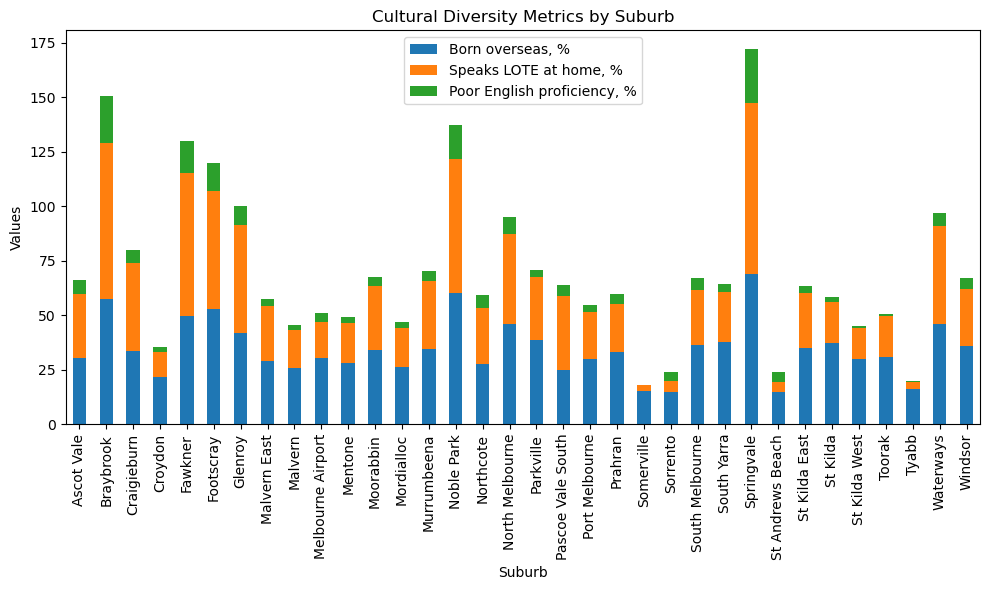

In [27]:
import matplotlib.pyplot as plt

# Select the numerical columns for plotting
y = ['Born overseas, %', 'Speaks LOTE at home, %', 'Poor English proficiency, %']  

# Plot a stacked bar chart
data.plot(x='Suburb', y=y, kind='bar', stacked=True, figsize=(10, 6))

# Add labels and title
plt.title('Cultural Diversity Metrics by Suburb')
plt.xlabel('Suburb')
plt.ylabel('Values')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.legend(title='')

# Show the plot
plt.tight_layout()
plt.show()